In [1]:
# import gym
# import gym_oscillator
# import oscillator_cpp
# from stable_baselines.common import set_global_seeds

# from stable_baselines.common.policies import MlpPolicy,MlpLnLstmPolicy,FeedForwardPolicy
# from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
# from stable_baselines import PPO2
# from stable_baselines.common.vec_env import VecEnv

# import numpy as np
# from matplotlib import pyplot as plt


import gym
import gym_oscillator
import oscillator_cpp
from stable_baselines3.common.utils import set_random_seed

from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecNormalize
from stable_baselines3 import PPO

import numpy as np
from matplotlib import pyplot as plt



In [2]:
def make_env(env_id, rank, seed=0,):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        
        env = gym.make(env_id)
        print(f"Environment {env_id} created successfully in subprocess {rank}")
        print(env.reset().shape)
        return env
    set_random_seed(seed)
    return _init

### To train with stablebaselines

In [3]:
# Check if the environment is registered
try:
    gym.envs.registry['oscillator-v0']
    print("oscillator-v0 environment is registered")
except KeyError:
    print("oscillator-v0 environment is NOT registered")
    # Try to register it manually if needed

# Test with single environment first
env_id = 'oscillator-v0'
print(f"Creating single environment: {env_id}")

# Test single environment creation
test_env = gym.make(env_id)
print(f"Single environment created successfully!")
print(f"Observation space: {test_env.observation_space}")
print(f"Action space: {test_env.action_space}")
test_reset = test_env.reset()
print(f"Reset output shape: {test_reset.shape if hasattr(test_reset, 'shape') else type(test_reset)}")
test_env.close()

# Now try with DummyVecEnv (single process) first
print("\nTesting with DummyVecEnv (single process)...")
env = DummyVecEnv([lambda: gym.make(env_id)])
print("DummyVecEnv created successfully!")

# Create model with single environment
time_steps = int(10e6)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
print("Model created successfully!")

# If single process works, we can try multiprocessing later
# Commented out multiprocessing for now:
# num_cpu = 8
# env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

oscillator-v0 environment is registered
Creating single environment: oscillator-v0
Single environment created successfully!
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Reset output shape: (250,)

Testing with DummyVecEnv (single process)...
DummyVecEnv created successfully!
Using cuda device


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Model created successfully!


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


### Save

In [4]:
# model.save('trained_models/model5layers.tf')

### Load model

In [5]:
env_id = 'oscillator-v0'
env = gym.make(env_id)
#Number of cpus
num_cpu = 1

env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model = model.load('trained_models/Ps6_final_3')

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

NameError: name 'PPO2' is not defined

In [26]:
env = gym.make(env_id)
#Store rewards
rews_ = []
#Store observations
obs_ = []
obs = env.reset()
#Store actions
acs_ = []
#Store X,Y according to 
states_x = []
states_y = []

#Initial, non-suppresssion 
for i in range(25000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)

#Suppression stage
for i in range(25000):
    action, _states = model.predict(obs)
   
    obs, rewards, dones, info = env.step(action)
   
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(action)
    rews_.append(rewards)

#Final relaxation
for i in range(5000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)


### Graph plot

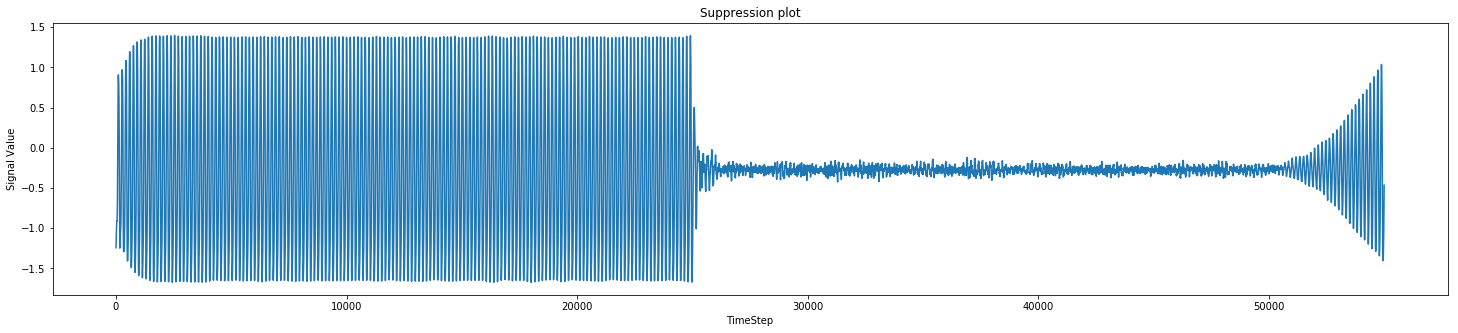

In [9]:
plt.figure(figsize=(25,5))
plt.title('Suppression plot')
plt.xlabel('TimeStep')
plt.ylabel('Signal Value')
plt.plot(states_x)

### Model score:

In [12]:
print(np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
s = (np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
print(np.sqrt(s))

27.266212742105157
5.22170592259897


In [11]:
print(np.mean(states_x[5000:150000]))

-0.2683076704695317


In [31]:
np.sqrt(1.10554209724429/0.0367348421348131)

5.48590841941973

## Env Analysis

/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Environment Analysis:
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Initial observation shape: (250,)

Data collection complete!
Observations shape: (1000, 250)
Actions shape: (1000, 1)


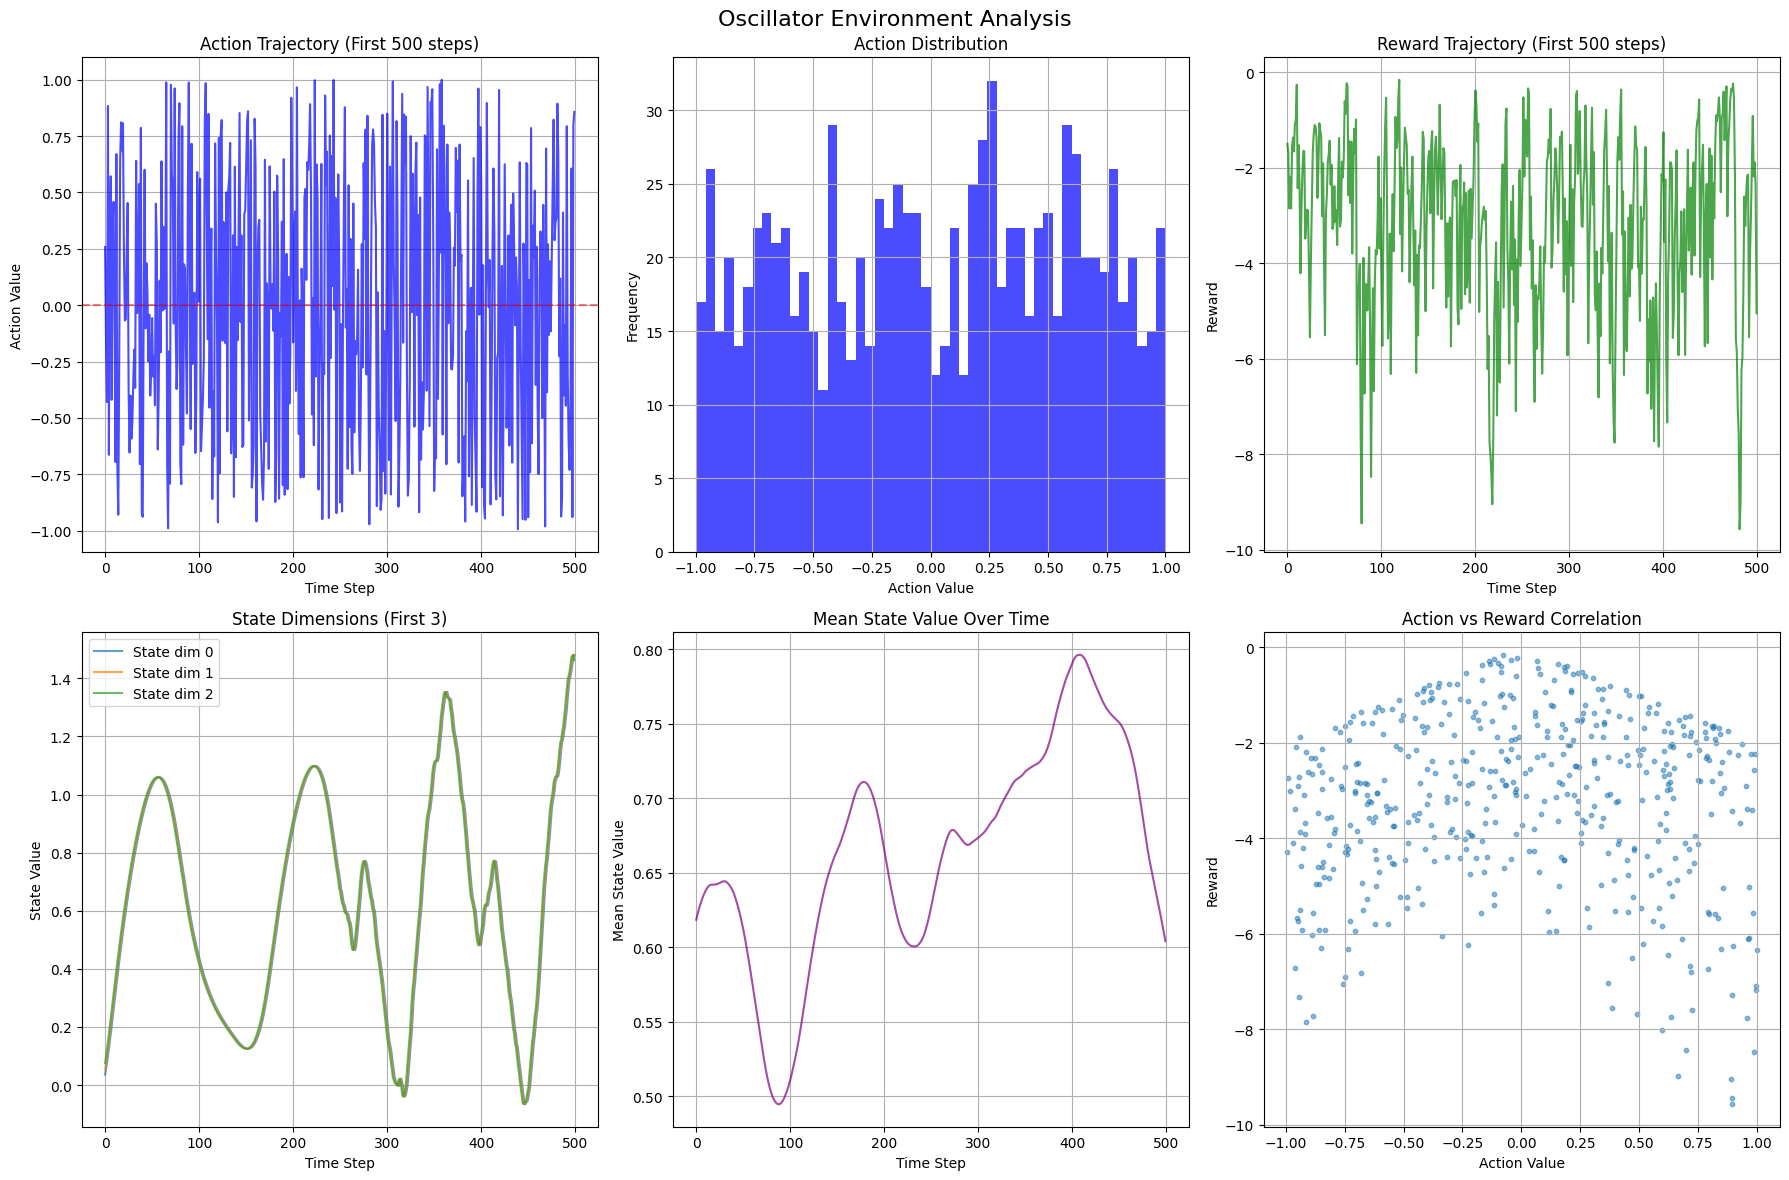


ENVIRONMENT STATISTICS
Action Statistics:
  Mean: 0.0188
  Std:  0.5694
  Min:  -0.9976
  Max:  0.9999

Reward Statistics:
  Mean: -3.3188
  Std:  1.7942
  Min:  -9.5671
  Max:  -0.1006

State Statistics:
  State shape: (1000, 250)
  State mean: 0.7042
  State std:  0.5001
  State range: [-0.2840, 1.7400]

State Dimension Analysis:
  Dim  0: mean= 0.6764, std= 0.4812, range=[-0.2840,  1.7400]
  Dim  1: mean= 0.6778, std= 0.4814, range=[-0.2840,  1.7400]
  Dim  2: mean= 0.6792, std= 0.4817, range=[-0.2840,  1.7400]
  Dim  3: mean= 0.6806, std= 0.4819, range=[-0.2840,  1.7400]
  Dim  4: mean= 0.6820, std= 0.4822, range=[-0.2840,  1.7400]
  Dim  5: mean= 0.6834, std= 0.4826, range=[-0.2840,  1.7400]
  Dim  6: mean= 0.6847, std= 0.4831, range=[-0.2840,  1.7400]
  Dim  7: mean= 0.6861, std= 0.4835, range=[-0.2840,  1.7400]
  Dim  8: mean= 0.6874, std= 0.4840, range=[-0.2840,  1.7400]
  Dim  9: mean= 0.6886, std= 0.4844, range=[-0.2840,  1.7400]

Environment Behavior Analysis:
  Episodes co

In [4]:
# Fix NumPy compatibility issue
import numpy as np
import warnings

# Patch numpy.bool8 if it doesn't exist (compatibility fix)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Environment Analysis: Plot Actions and States (Fixed Version)
import matplotlib.pyplot as plt
import gym
import gym_oscillator

# Create a single environment for analysis
env = gym.make('oscillator-v0')

# Handle both old and new gym API
try:
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]  # New gym API returns (obs, info)
except:
    obs = env.reset()

# Collect data from environment
num_steps = 1000
observations = []
actions = []
rewards = []
dones = []

print(f"Environment Analysis:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print(f"Initial observation shape: {obs.shape}")

# Run random actions to collect data
print(f"\nCollecting {num_steps} steps of data...")
for step in range(num_steps):
    # Sample random action
    action = env.action_space.sample()
    
    # Take step - handle both old and new gym API
    try:
        step_result = env.step(action)
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        else:  # New gym API returns 5 values
            obs, reward, terminated, truncated, info = step_result
            done = terminated or truncated
    except Exception as e:
        print(f"Step error: {e}")
        break
    
    # Store data
    observations.append(obs.copy())
    actions.append(action.copy())
    rewards.append(reward)
    dones.append(done)
    
    # Reset if done
    if done:
        reset_result = env.reset()
        if isinstance(reset_result, tuple):
            obs = reset_result[0]  # New gym API
        else:
            obs = reset_result  # Old gym API

# Convert to numpy arrays
observations = np.array(observations)
actions = np.array(actions)
rewards = np.array(rewards)

print(f"Data collection complete!")
print(f"Observations shape: {observations.shape}")
print(f"Actions shape: {actions.shape}")

# Create comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Oscillator Environment Analysis', fontsize=16)

# Plot 1: Action trajectory
plot_steps = min(500, len(actions))
axes[0, 0].plot(actions[:plot_steps], 'b-', alpha=0.7)
axes[0, 0].set_title(f'Action Trajectory (First {plot_steps} steps)')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].set_ylabel('Action Value')
axes[0, 0].grid(True)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 2: Action distribution
axes[0, 1].hist(actions.flatten(), bins=50, alpha=0.7, color='blue')
axes[0, 1].set_title('Action Distribution')
axes[0, 1].set_xlabel('Action Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot 3: Reward trajectory
axes[0, 2].plot(rewards[:plot_steps], 'g-', alpha=0.7)
axes[0, 2].set_title(f'Reward Trajectory (First {plot_steps} steps)')
axes[0, 2].set_xlabel('Time Step')
axes[0, 2].set_ylabel('Reward')
axes[0, 2].grid(True)

# Plot 4: State space analysis (first few dimensions)
axes[1, 0].plot(observations[:plot_steps, 0], label='State dim 0', alpha=0.7)
if observations.shape[1] > 1:
    axes[1, 0].plot(observations[:plot_steps, 1], label='State dim 1', alpha=0.7)
if observations.shape[1] > 2:
    axes[1, 0].plot(observations[:plot_steps, 2], label='State dim 2', alpha=0.7)
axes[1, 0].set_title('State Dimensions (First 3)')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('State Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 5: State mean across time
state_means = np.mean(observations, axis=1)
axes[1, 1].plot(state_means[:plot_steps], 'purple', alpha=0.7)
axes[1, 1].set_title('Mean State Value Over Time')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].set_ylabel('Mean State Value')
axes[1, 1].grid(True)

# Plot 6: Action vs Reward correlation
axes[1, 2].scatter(actions[:plot_steps], rewards[:plot_steps], alpha=0.5, s=10)
axes[1, 2].set_title('Action vs Reward Correlation')
axes[1, 2].set_xlabel('Action Value')
axes[1, 2].set_ylabel('Reward')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\n" + "="*50)
print("ENVIRONMENT STATISTICS")
print("="*50)
print(f"Action Statistics:")
print(f"  Mean: {np.mean(actions):.4f}")
print(f"  Std:  {np.std(actions):.4f}")
print(f"  Min:  {np.min(actions):.4f}")
print(f"  Max:  {np.max(actions):.4f}")

print(f"\nReward Statistics:")
print(f"  Mean: {np.mean(rewards):.4f}")
print(f"  Std:  {np.std(rewards):.4f}")
print(f"  Min:  {np.min(rewards):.4f}")
print(f"  Max:  {np.max(rewards):.4f}")

print(f"\nState Statistics:")
print(f"  State shape: {observations.shape}")
print(f"  State mean: {np.mean(observations):.4f}")
print(f"  State std:  {np.std(observations):.4f}")
print(f"  State range: [{np.min(observations):.4f}, {np.max(observations):.4f}]")

# Analyze state dimensions
print(f"\nState Dimension Analysis:")
for i in range(min(10, observations.shape[1])):  # First 10 dimensions
    dim_data = observations[:, i]
    print(f"  Dim {i:2d}: mean={np.mean(dim_data):7.4f}, std={np.std(dim_data):7.4f}, range=[{np.min(dim_data):7.4f}, {np.max(dim_data):7.4f}]")

# Check for any patterns or interesting behaviors
print(f"\nEnvironment Behavior Analysis:")
print(f"  Episodes completed: {np.sum(dones)}")
print(f"  Average episode length: {len(dones) / max(1, np.sum(dones)):.1f}")
if len(actions) > 0 and len(rewards) > 0:
    print(f"  Action-reward correlation: {np.corrcoef(actions.flatten(), rewards)[0,1]:.4f}")

env.close()

## Multi ENV RL-DBS

In [5]:
# Corrected Multi-environment setup with SubprocVecEnv
import gym
import gym_oscillator
import numpy as np
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3 import PPO

def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param rank: (int) index of the subprocess
    :param seed: (int) the initial seed for RNG
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        import numpy as np
        
        # Set numpy random seed for this process
        np.random.seed(seed + rank)
        
        env = gym.make(env_id)
        
        # Try to seed the environment if it supports it
        try:
            if hasattr(env, 'seed'):
                env.seed(seed + rank)
            elif hasattr(env.unwrapped, 'seed'):
                env.unwrapped.seed(seed + rank)
        except AttributeError:
            # If no seed method, just set numpy seed (already done above)
            pass
        
        return env
    
    set_random_seed(seed + rank)
    return _init

# Environment configuration
env_id = 'oscillator-v0'
num_cpu = 4  # Reduced from 8 to start smaller
seed = 42

# Create multi-environment
print(f"Creating {num_cpu} parallel environments...")
try:
    env = SubprocVecEnv([make_env(env_id, i, seed) for i in range(num_cpu)])
    print("Multi-environment created successfully!")
    
    # Create PPO model for multi-environment training
    model = PPO(
        "MlpPolicy", 
        env, 
        verbose=1,
        tensorboard_log="MLP/",
        device="cpu"  # Use CPU to avoid GPU warnings with multiprocessing
    )
    
    print("PPO model created with multi-environment setup!")
    print(f"Total environments: {env.num_envs}")
    
except Exception as e:
    print(f"Multi-environment failed: {e}")
    print("Falling back to single environment...")
    
    # Fallback to single environment
    env = DummyVecEnv([lambda: gym.make(env_id)])
    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
    print("Single environment setup completed!")

Creating 4 parallel environments...


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioni

Multi-environment created successfully!
Using cpu device
PPO model created with multi-environment setup!
Total environments: 4


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


## System ID using Neural ODE

In [8]:
# Neural ODE System Identification for RL-DBS
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

Using device: cuda


In [9]:
class RLDBSDataCollector:
    """Collect trajectory data from RL-DBS environment for system identification"""
    
    def __init__(self, env_id='oscillator-v0'):
        self.env = gym.make(env_id)
        self.data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': []
        }
    
    def collect_trajectory(self, num_steps=5000, action_type='random', noise_level=0.1):
        """
        Collect trajectory data from the environment
        
        Args:
            num_steps: Number of steps to collect
            action_type: 'random', 'sinusoidal', 'zero', 'mixed'
            noise_level: Noise level for actions
        """
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
            
        states = []
        actions = []
        next_states = []
        x_vals = []
        y_vals = []
        
        for step in range(num_steps):
            # Generate action based on type
            if action_type == 'random':
                action = np.random.uniform(-1, 1, (1,)) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'sinusoidal':
                action = np.array([0.5 * np.sin(0.01 * step)]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'zero':
                action = np.array([0.0]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'mixed':
                if step < num_steps // 3:
                    action = np.array([0.0])  # No stimulation
                elif step < 2 * num_steps // 3:
                    action = np.array([0.8 * np.sin(0.02 * step)])  # Sinusoidal stimulation
                else:
                    action = np.random.uniform(-0.5, 0.5, (1,))  # Random stimulation
            
            # Clip action to valid range
            action = np.clip(action, -1, 1)
            
            # Store current state
            states.append(obs.copy())
            actions.append(action.copy())
            x_vals.append(self.env.x_val)
            y_vals.append(self.env.y_val)
            
            # Take step
            obs, reward, done, info = self.env.step(action)
            if isinstance(obs, tuple):
                obs = obs[0]
            
            # Store next state
            next_states.append(obs.copy())
            
            if done:
                obs = self.env.reset()
                if isinstance(obs, tuple):
                    obs = obs[0]
        
        # Convert to numpy arrays
        self.data['states'] = np.array(states)
        self.data['actions'] = np.array(actions)
        self.data['next_states'] = np.array(next_states)
        self.data['x_vals'] = np.array(x_vals)
        self.data['y_vals'] = np.array(y_vals)
        self.data['timestamps'] = np.arange(len(states))
        
        return self.data
    
    def visualize_data(self):
        """Visualize collected data"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Plot x and y mean field values
        axes[0, 0].plot(self.data['timestamps'], self.data['x_vals'], label='X (mean field)', alpha=0.8)
        axes[0, 0].plot(self.data['timestamps'], self.data['y_vals'], label='Y (mean field)', alpha=0.8)
        axes[0, 0].set_title('Mean Field Oscillator Dynamics')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Plot actions
        axes[0, 1].plot(self.data['timestamps'], self.data['actions'][:, 0], 'r-', alpha=0.7)
        axes[0, 1].set_title('DBS Stimulation Actions')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Action Value')
        axes[0, 1].grid(True)
        
        # Plot state evolution (first few dimensions)
        axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 0], label='State dim 0', alpha=0.7)
        if self.data['states'].shape[1] > 1:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 10], label='State dim 10', alpha=0.7)
        if self.data['states'].shape[1] > 20:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 20], label='State dim 20', alpha=0.7)
        axes[1, 0].set_title('State Evolution (Selected Dimensions)')
        axes[1, 0].set_xlabel('Time Step')
        axes[1, 0].set_ylabel('State Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Phase plot
        scatter = axes[1, 1].scatter(self.data['x_vals'], self.data['y_vals'], 
                  c=self.data['timestamps'], cmap='viridis', alpha=0.6, s=1)
        axes[1, 1].set_title('Phase Space (X-Y Mean Field)')
        axes[1, 1].set_xlabel('X Value')
        axes[1, 1].set_ylabel('Y Value')
        plt.colorbar(scatter, ax=axes[1, 1], label='Time Step')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()

In [10]:
class NeuralODEFunc(nn.Module):
    """Neural ODE function for learning the brain oscillator dynamics"""
    
    def __init__(self, input_dim=2, hidden_dim=64, action_dim=1):
        super(NeuralODEFunc, self).__init__()
        self.input_dim = input_dim  # [x, y] mean field values
        self.action_dim = action_dim
        
        # Main dynamics network
        self.net = nn.Sequential(
            nn.Linear(input_dim + action_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, input_dim)
        )
        
        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)
    
    def forward(self, t, state_action):
        """
        Forward pass of the Neural ODE
        
        Args:
            t: time (not used but required by odeint)
            state_action: concatenated [state, action] tensor
        
        Returns:
            derivative of state
        """
        batch_size = state_action.shape[0]
        state = state_action[:, :self.input_dim]
        action = state_action[:, self.input_dim:]
        
        # Compute derivative
        input_tensor = torch.cat([state, action], dim=1)
        derivative = self.net(input_tensor)
        
        # Return derivative with zero action derivative (action is external input)
        zero_action_derivative = torch.zeros(batch_size, self.action_dim, device=state_action.device)
        return torch.cat([derivative, zero_action_derivative], dim=1)

class BrainOscillatorNeuralODE(nn.Module):
    """Complete Neural ODE model for brain oscillator system identification"""
    
    def __init__(self, state_dim=2, hidden_dim=64, action_dim=1):
        super(BrainOscillatorNeuralODE, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.func = NeuralODEFunc(state_dim, hidden_dim, action_dim)
        
        # Observation model (if needed to map from mean field to full state)
        self.observation_net = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 250),  # Output dimension matches env observation
            nn.Tanh()
        )
    
    def forward(self, initial_state, actions, t_span):
        """
        Forward simulation of the Neural ODE model
        
        Args:
            initial_state: [batch_size, state_dim]
            actions: [batch_size, seq_len, action_dim]
            t_span: time points for integration
        
        Returns:
            predicted states over time
        """
        batch_size, seq_len, _ = actions.shape
        
        # Store all states
        all_states = []
        current_state = initial_state
        
        for i in range(seq_len):
            # Current action
            current_action = actions[:, i:i+1, :]  # [batch_size, 1, action_dim]
            current_action = current_action.squeeze(1)  # [batch_size, action_dim]
            
            # Integrate over one time step
            state_action = torch.cat([current_state, current_action], dim=1)
            
            # Use odeint to solve the ODE
            t = torch.tensor([0.0, 1.0], device=current_state.device)
            solution = odeint(self.func, state_action, t, method='rk4')
            
            # Extract state at t=1 (next time step)
            next_state_action = solution[1]  # [batch_size, state_dim + action_dim]
            current_state = next_state_action[:, :self.state_dim]
            
            all_states.append(current_state.unsqueeze(1))
        
        # Concatenate all states
        predicted_states = torch.cat(all_states, dim=1)  # [batch_size, seq_len, state_dim]
        
        return predicted_states
    
    def predict_observations(self, states):
        """Map states to observations using observation model"""
        batch_size, seq_len, state_dim = states.shape
        states_flat = states.reshape(-1, state_dim)
        obs_flat = self.observation_net(states_flat)
        return obs_flat.reshape(batch_size, seq_len, -1)

In [11]:
class NeuralODETrainer:
    """Trainer class for Neural ODE system identification"""
    
    def __init__(self, model, learning_rate=1e-3, weight_decay=1e-4):
        self.model = model.to(device)
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=10)
        
        self.train_losses = []
        self.val_losses = []
        
    def prepare_data(self, data, sequence_length=50, stride=10):
        """
        Prepare data for Neural ODE training
        
        Args:
            data: Dictionary with collected trajectory data
            sequence_length: Length of sequences for training
            stride: Stride between sequences
        
        Returns:
            DataLoader objects for training and validation
        """
        # Extract mean field values as true states
        x_vals = data['x_vals']
        y_vals = data['y_vals']
        actions = data['actions']
        
        # Create state representation
        states = np.column_stack([x_vals, y_vals])  # [N, 2]
        
        # Create sequences
        X_sequences = []  # Initial states
        A_sequences = []  # Action sequences
        Y_sequences = []  # Target state sequences
        
        for i in range(0, len(states) - sequence_length, stride):
            # Initial state
            initial_state = states[i]
            
            # Action sequence
            action_seq = actions[i:i+sequence_length]
            
            # Target state sequence
            target_seq = states[i+1:i+sequence_length+1]
            
            X_sequences.append(initial_state)
            A_sequences.append(action_seq)
            Y_sequences.append(target_seq)
        
        # Convert to numpy arrays
        X_sequences = np.array(X_sequences)  # [N_seq, state_dim]
        A_sequences = np.array(A_sequences)  # [N_seq, seq_len, action_dim]
        Y_sequences = np.array(Y_sequences)  # [N_seq, seq_len, state_dim]
        
        # Normalize data
        self.state_scaler = StandardScaler()
        self.action_scaler = StandardScaler()
        
        # Fit scalers
        X_flat = X_sequences.reshape(-1, X_sequences.shape[-1])
        A_flat = A_sequences.reshape(-1, A_sequences.shape[-1])
        Y_flat = Y_sequences.reshape(-1, Y_sequences.shape[-1])
        
        self.state_scaler.fit(np.vstack([X_flat, Y_flat]))
        self.action_scaler.fit(A_flat)
        
        # Transform data
        X_sequences_norm = self.state_scaler.transform(X_sequences)
        A_sequences_norm = self.action_scaler.transform(A_sequences.reshape(-1, A_sequences.shape[-1]))
        A_sequences_norm = A_sequences_norm.reshape(A_sequences.shape)
        Y_sequences_norm = self.state_scaler.transform(Y_sequences.reshape(-1, Y_sequences.shape[-1]))
        Y_sequences_norm = Y_sequences_norm.reshape(Y_sequences.shape)
        
        # Split train/validation
        train_X, val_X, train_A, val_A, train_Y, val_Y = train_test_split(
            X_sequences_norm, A_sequences_norm, Y_sequences_norm, test_size=0.2, random_state=42
        )
        
        # Convert to tensors
        train_X = torch.FloatTensor(train_X).to(device)
        train_A = torch.FloatTensor(train_A).to(device)
        train_Y = torch.FloatTensor(train_Y).to(device)
        
        val_X = torch.FloatTensor(val_X).to(device)
        val_A = torch.FloatTensor(val_A).to(device)
        val_Y = torch.FloatTensor(val_Y).to(device)
        
        # Create data loaders
        train_dataset = TensorDataset(train_X, train_A, train_Y)
        val_dataset = TensorDataset(val_X, val_A, val_Y)
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        return train_loader, val_loader
    
    def train_epoch(self, train_loader):
        """Train for one epoch"""
        self.model.train()
        epoch_loss = 0.0
        
        for batch_idx, (initial_states, action_sequences, target_sequences) in enumerate(train_loader):
            self.optimizer.zero_grad()
            
            # Forward pass
            predicted_states = self.model(initial_states, action_sequences, None)
            
            # Compute loss
            loss = nn.MSELoss()(predicted_states, target_sequences)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            
            self.optimizer.step()
            
            epoch_loss += loss.item()
        
        return epoch_loss / len(train_loader)
    
    def validate(self, val_loader):
        """Validate the model"""
        self.model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for initial_states, action_sequences, target_sequences in val_loader:
                predicted_states = self.model(initial_states, action_sequences, None)
                loss = nn.MSELoss()(predicted_states, target_sequences)
                val_loss += loss.item()
        
        return val_loss / len(val_loader)
    
    def train(self, train_loader, val_loader, epochs=100):
        """Full training loop"""
        print("Starting Neural ODE training...")
        
        best_val_loss = float('inf')
        patience_counter = 0
        patience = 20
        
        for epoch in range(epochs):
            # Train
            train_loss = self.train_epoch(train_loader)
            
            # Validate
            val_loss = self.validate(val_loader)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            
            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_neural_ode_model.pth')
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}")
        
        # Load best model
        self.model.load_state_dict(torch.load('best_neural_ode_model.pth'))
        print("Training completed!")
        
    def plot_training_history(self):
        """Plot training and validation losses"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Training Loss', alpha=0.7)
        plt.plot(self.val_losses, label='Validation Loss', alpha=0.7)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Neural ODE Training History')
        plt.legend()
        plt.grid(True)
        plt.yscale('log')
        plt.show()

In [12]:
class NeuralODEEvaluator:
    """Evaluation and visualization tools for trained Neural ODE model"""
    
    def __init__(self, model, trainer):
        self.model = model
        self.trainer = trainer
        self.env = gym.make('oscillator-v0')
    
    def simulate_trajectory(self, initial_state, actions, denormalize=True):
        """
        Simulate a trajectory using the trained Neural ODE model
        
        Args:
            initial_state: Initial state [x, y]
            actions: Action sequence
            denormalize: Whether to denormalize the output
        
        Returns:
            Predicted state trajectory
        """
        self.model.eval()
        
        with torch.no_grad():
            # Normalize inputs
            if denormalize:
                initial_state_norm = self.trainer.state_scaler.transform(initial_state.reshape(1, -1))
                actions_norm = self.trainer.action_scaler.transform(actions.reshape(-1, 1))
                actions_norm = actions_norm.reshape(1, -1, 1)
            else:
                initial_state_norm = initial_state.reshape(1, -1)
                actions_norm = actions.reshape(1, -1, 1)
            
            # Convert to tensors
            initial_tensor = torch.FloatTensor(initial_state_norm).to(device)
            actions_tensor = torch.FloatTensor(actions_norm).to(device)
            
            # Predict
            predicted_states = self.model(initial_tensor, actions_tensor, None)
            predicted_states = predicted_states.cpu().numpy().squeeze()
            
            # Denormalize if requested
            if denormalize:
                predicted_states = self.trainer.state_scaler.inverse_transform(
                    predicted_states.reshape(-1, predicted_states.shape[-1])
                ).reshape(predicted_states.shape)
        
        return predicted_states
    
    def compare_with_environment(self, num_steps=1000, action_type='sinusoidal'):
        """
        Compare Neural ODE predictions with actual environment dynamics
        """
        # Reset environment and get initial state
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        
        initial_x = self.env.x_val
        initial_y = self.env.y_val
        initial_state = np.array([initial_x, initial_y])
        
        # Generate action sequence
        if action_type == 'sinusoidal':
            actions = np.array([0.5 * np.sin(0.02 * i) for i in range(num_steps)])
        elif action_type == 'random':
            actions = np.random.uniform(-0.5, 0.5, num_steps)
        elif action_type == 'zero':
            actions = np.zeros(num_steps)
        
        # Simulate with Neural ODE
        predicted_states = self.simulate_trajectory(initial_state, actions)
        
        # Simulate with actual environment
        actual_x_vals = [initial_x]
        actual_y_vals = [initial_y]
        
        for action in actions:
            obs, reward, done, info = self.env.step([action])
            if isinstance(obs, tuple):
                obs = obs[0]
            actual_x_vals.append(self.env.x_val)
            actual_y_vals.append(self.env.y_val)
            
            if done:
                break
        
        actual_states = np.column_stack([actual_x_vals[1:], actual_y_vals[1:]])
        
        # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # X trajectory comparison
        axes[0, 0].plot(actual_states[:, 0], label='Environment', alpha=0.8)
        axes[0, 0].plot(predicted_states[:, 0], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 0].set_title('X Component Comparison')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('X Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Y trajectory comparison
        axes[0, 1].plot(actual_states[:, 1], label='Environment', alpha=0.8)
        axes[0, 1].plot(predicted_states[:, 1], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 1].set_title('Y Component Comparison')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Y Value')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Phase space comparison
        axes[1, 0].plot(actual_states[:, 0], actual_states[:, 1], label='Environment', alpha=0.7)
        axes[1, 0].plot(predicted_states[:, 0], predicted_states[:, 1], label='Neural ODE', alpha=0.7, linestyle='--')
        axes[1, 0].set_title('Phase Space Comparison')
        axes[1, 0].set_xlabel('X Value')
        axes[1, 0].set_ylabel('Y Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Action sequence
        axes[1, 1].plot(actions, 'r-', alpha=0.7)
        axes[1, 1].set_title('Action Sequence (DBS Stimulation)')
        axes[1, 1].set_xlabel('Time Step')
        axes[1, 1].set_ylabel('Action Value')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Compute metrics
        mse_x = np.mean((actual_states[:, 0] - predicted_states[:, 0])**2)
        mse_y = np.mean((actual_states[:, 1] - predicted_states[:, 1])**2)
        
        print(f"Prediction Accuracy Metrics:")
        print(f"  MSE X: {mse_x:.6f}")
        print(f"  MSE Y: {mse_y:.6f}")
        print(f"  Total MSE: {mse_x + mse_y:.6f}")
        
        return predicted_states, actual_states
    
    def analyze_learned_dynamics(self):
        """Analyze the learned dynamics of the Neural ODE"""
        # Create a grid of states and actions
        x_range = np.linspace(-2, 2, 20)
        y_range = np.linspace(-2, 2, 20)
        actions_test = [-1.0, 0.0, 1.0]  # Different stimulation levels
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for idx, action in enumerate(actions_test):
            X, Y = np.meshgrid(x_range, y_range)
            U = np.zeros_like(X)
            V = np.zeros_like(Y)
            
            # Compute vector field
            for i in range(len(x_range)):
                for j in range(len(y_range)):
                    state = np.array([[X[j, i], Y[j, i]]])
                    action_arr = np.array([action])
                    
                    # Normalize
                    state_norm = self.trainer.state_scaler.transform(state)
                    action_norm = self.trainer.action_scaler.transform(action_arr.reshape(-1, 1))
                    
                    # Convert to tensor
                    state_tensor = torch.FloatTensor(state_norm).to(device)
                    action_tensor = torch.FloatTensor(action_norm).to(device)
                    state_action = torch.cat([state_tensor, action_tensor], dim=1)
                    
                    # Get derivative
                    with torch.no_grad():
                        derivative = self.model.func(0, state_action)
                        derivative = derivative[:, :2].cpu().numpy()  # Only state derivatives
                    
                    # Denormalize derivative (approximate)
                    derivative = derivative * self.trainer.state_scaler.scale_
                    
                    U[j, i] = derivative[0, 0]
                    V[j, i] = derivative[0, 1]
            
            # Plot vector field
            axes[idx].quiver(X, Y, U, V, alpha=0.6)
            axes[idx].set_title(f'Learned Dynamics (Action = {action})')
            axes[idx].set_xlabel('X')
            axes[idx].set_ylabel('Y')
            axes[idx].grid(True)
            axes[idx].set_aspect('equal')
        
        plt.tight_layout()
        plt.show()

In [13]:
def train_neural_ode_system_identification():
    """Complete pipeline for Neural ODE system identification"""
    
    print("Neural ODE System Identification for RL-DBS")
    print("=" * 60)
    
    # Step 1: Collect data from environment
    print("Step 1: Collecting trajectory data from RL-DBS environment...")
    collector = RLDBSDataCollector()
    
    # Collect diverse trajectories
    data_random = collector.collect_trajectory(num_steps=3000, action_type='random')
    data_sin = collector.collect_trajectory(num_steps=2000, action_type='sinusoidal')
    data_mixed = collector.collect_trajectory(num_steps=2000, action_type='mixed')
    
    # Combine datasets
    combined_data = {
        'states': np.vstack([data_random['states'], data_sin['states'], data_mixed['states']]),
        'actions': np.vstack([data_random['actions'], data_sin['actions'], data_mixed['actions']]),
        'next_states': np.vstack([data_random['next_states'], data_sin['next_states'], data_mixed['next_states']]),
        'x_vals': np.concatenate([data_random['x_vals'], data_sin['x_vals'], data_mixed['x_vals']]),
        'y_vals': np.concatenate([data_random['y_vals'], data_sin['y_vals'], data_mixed['y_vals']]),
        'timestamps': np.concatenate([data_random['timestamps'], 
                                    data_sin['timestamps'] + len(data_random['timestamps']),
                                    data_mixed['timestamps'] + len(data_random['timestamps']) + len(data_sin['timestamps'])])
    }
    
    print(f"   Collected {len(combined_data['x_vals'])} data points")
    
    # Visualize collected data
    collector.data = combined_data
    collector.visualize_data()
    
    # Step 2: Create and train Neural ODE model
    print("\nStep 2: Creating Neural ODE model...")
    model = BrainOscillatorNeuralODE(state_dim=2, hidden_dim=128, action_dim=1)
    trainer = NeuralODETrainer(model, learning_rate=1e-3)
    
    # Prepare data
    print("Step 3: Preparing training data...")
    train_loader, val_loader = trainer.prepare_data(combined_data, sequence_length=30, stride=5)
    
    # Train the model
    print("Step 4: Training Neural ODE model...")
    trainer.train(train_loader, val_loader, epochs=200)
    
    # Plot training history
    trainer.plot_training_history()
    
    # Step 5: Evaluate the trained model
    print("Step 5: Evaluating trained model...")
    evaluator = NeuralODEEvaluator(model, trainer)
    
    # Compare with environment
    print("Comparing Neural ODE predictions with environment dynamics...")
    evaluator.compare_with_environment(num_steps=500, action_type='sinusoidal')
    
    # Analyze learned dynamics
    print("Analyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Step 6: Test on new trajectories
    print("\nStep 6: Testing on new trajectory...")
    test_collector = RLDBSDataCollector()
    test_data = test_collector.collect_trajectory(num_steps=1000, action_type='random', noise_level=0.05)
    
    # Use trained model to predict
    initial_state = np.array([test_data['x_vals'][0], test_data['y_vals'][0]])
    predicted_trajectory = evaluator.simulate_trajectory(initial_state, test_data['actions'][:, 0])
    actual_trajectory = np.column_stack([test_data['x_vals'][1:], test_data['y_vals'][1:]])

    # Ensure both trajectories have the same length
    min_length = min(len(actual_trajectory), len(predicted_trajectory))
    actual_trajectory = actual_trajectory[:min_length]
    predicted_trajectory = predicted_trajectory[:min_length]
    
    # Plot comparison
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(actual_trajectory[:, 0], label='Actual X', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], label='Predicted X', linestyle='--', alpha=0.8)
    plt.title('X Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(actual_trajectory[:, 1], label='Actual Y', alpha=0.8)
    plt.plot(predicted_trajectory[:, 1], label='Predicted Y', linestyle='--', alpha=0.8)
    plt.title('Y Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.plot(actual_trajectory[:, 0], actual_trajectory[:, 1], label='Actual', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], predicted_trajectory[:, 1], label='Predicted', linestyle='--', alpha=0.8)
    plt.title('Phase Space - Test Trajectory')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.plot(test_data['actions'][:1000, 0], 'r-', alpha=0.7)
    plt.title('Test Action Sequence')
    plt.xlabel('Time Step')
    plt.ylabel('Action')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Final evaluation metrics
    test_mse = np.mean((actual_trajectory - predicted_trajectory)**2)
    print(f"\n Final Test MSE: {test_mse:.6f}")
    
    print("\n Neural ODE System Identification Complete!")
    print("The model has learned to approximate the RL-DBS brain oscillator dynamics.")
    
    return model, trainer, evaluator

Neural ODE System Identification for RL-DBS
Step 1: Collecting trajectory data from RL-DBS environment...
   Collected 6000 data points


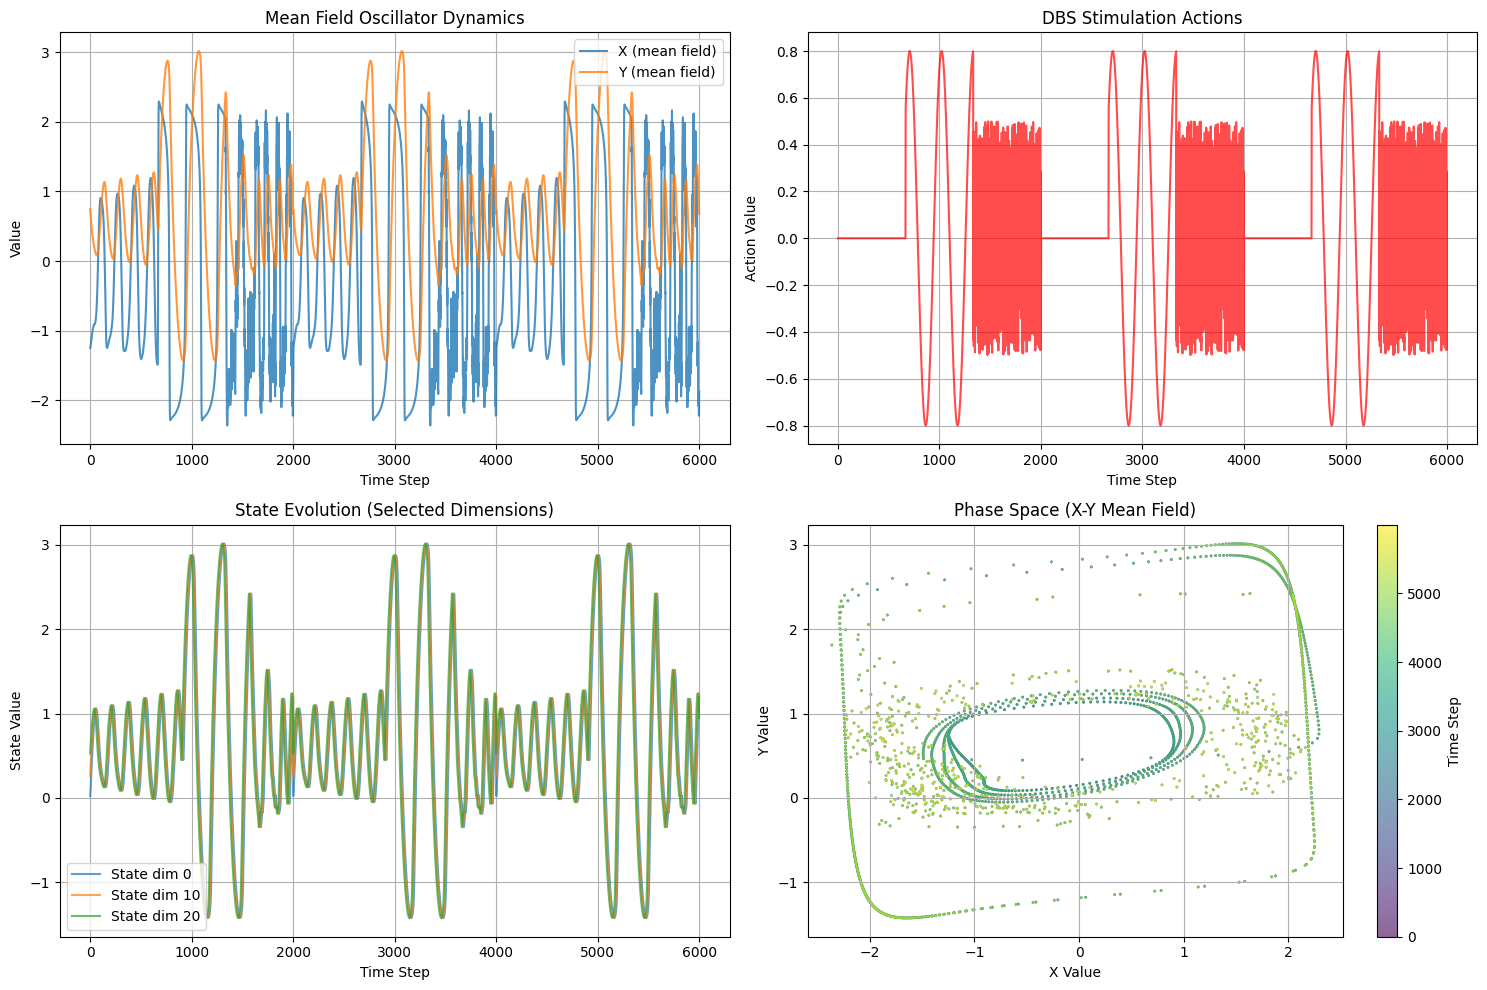


Step 2: Creating Neural ODE model...
Step 3: Preparing training data...
Step 4: Training Neural ODE model...
Starting Neural ODE training...
Epoch   0: Train Loss = 0.565299, Val Loss = 0.764416
Epoch  10: Train Loss = 0.042753, Val Loss = 0.022600
Epoch  20: Train Loss = 0.035553, Val Loss = 0.023639
Epoch  30: Train Loss = 0.029089, Val Loss = 0.051339
Epoch  40: Train Loss = 0.027210, Val Loss = 0.032293
Epoch  50: Train Loss = 0.011298, Val Loss = 0.010730
Epoch  60: Train Loss = 0.010057, Val Loss = 0.009659
Epoch  70: Train Loss = 0.010050, Val Loss = 0.010100
Epoch  80: Train Loss = 0.008494, Val Loss = 0.008312
Epoch  90: Train Loss = 0.008347, Val Loss = 0.008128
Epoch 100: Train Loss = 0.008207, Val Loss = 0.007967
Epoch 110: Train Loss = 0.008153, Val Loss = 0.007914
Epoch 120: Train Loss = 0.007937, Val Loss = 0.007713
Epoch 130: Train Loss = 0.007825, Val Loss = 0.007645
Epoch 140: Train Loss = 0.007695, Val Loss = 0.007602
Epoch 150: Train Loss = 0.007583, Val Loss = 0.0

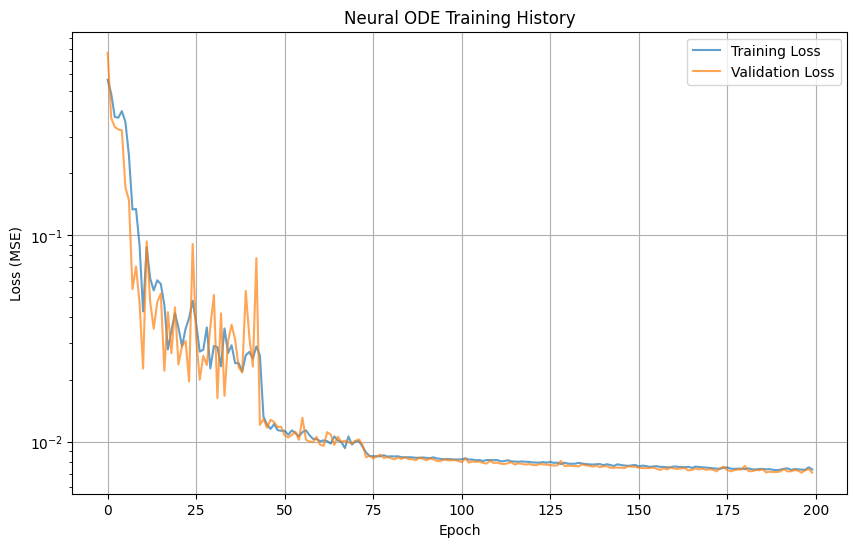

Step 5: Evaluating trained model...
Comparing Neural ODE predictions with environment dynamics...


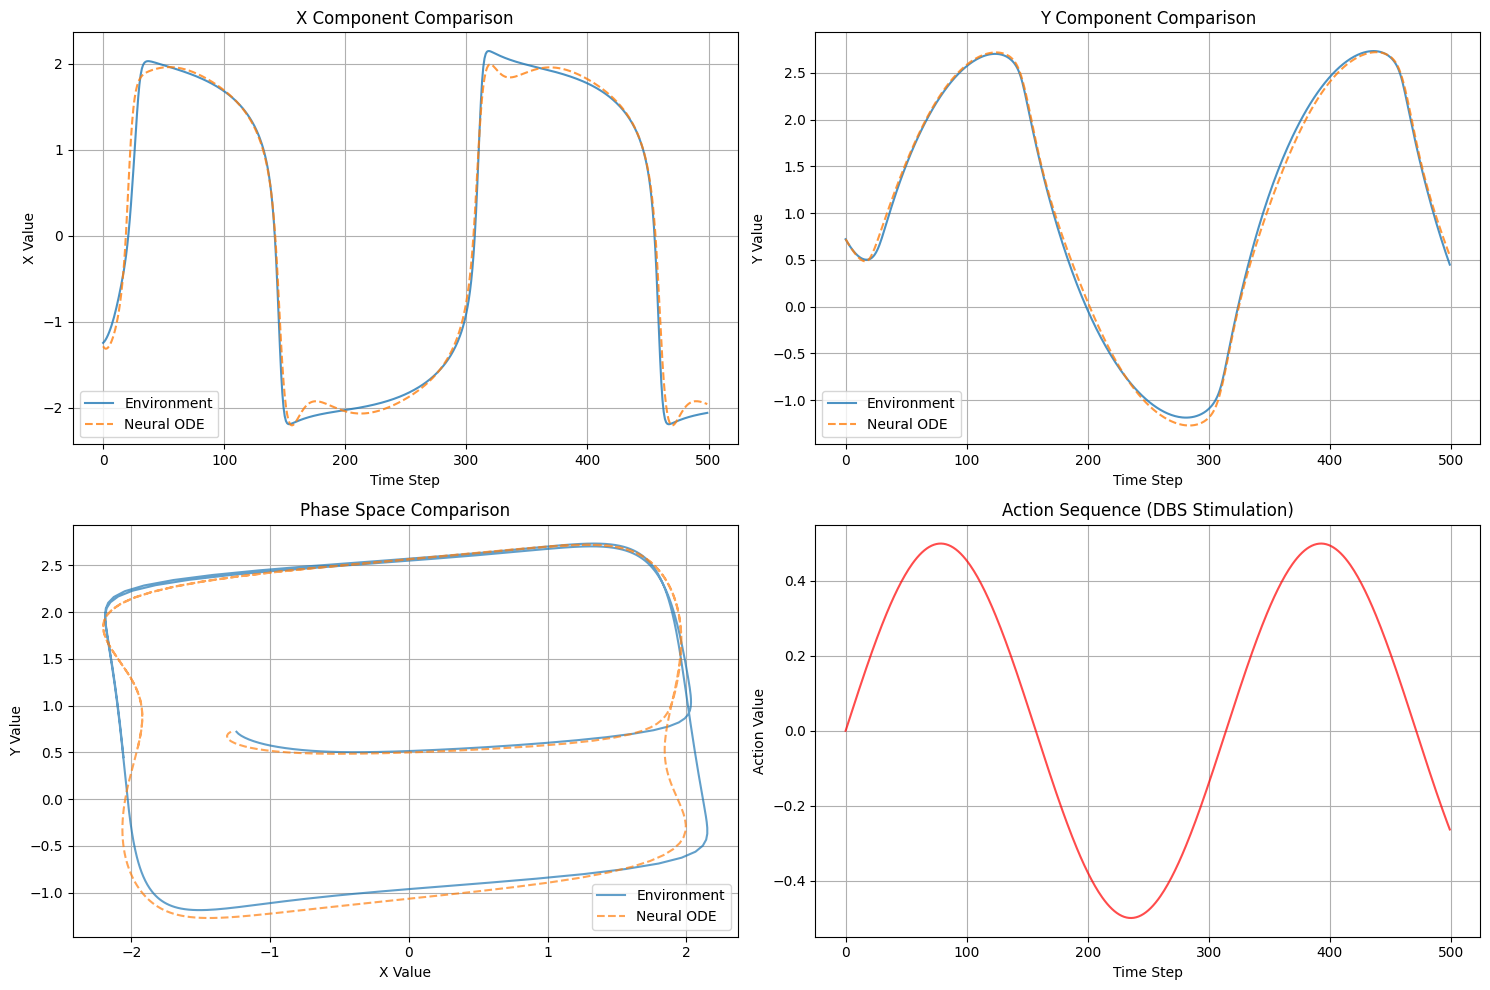

Prediction Accuracy Metrics:
  MSE X: 0.018264
  MSE Y: 0.003547
  Total MSE: 0.021811
Analyzing learned dynamics...


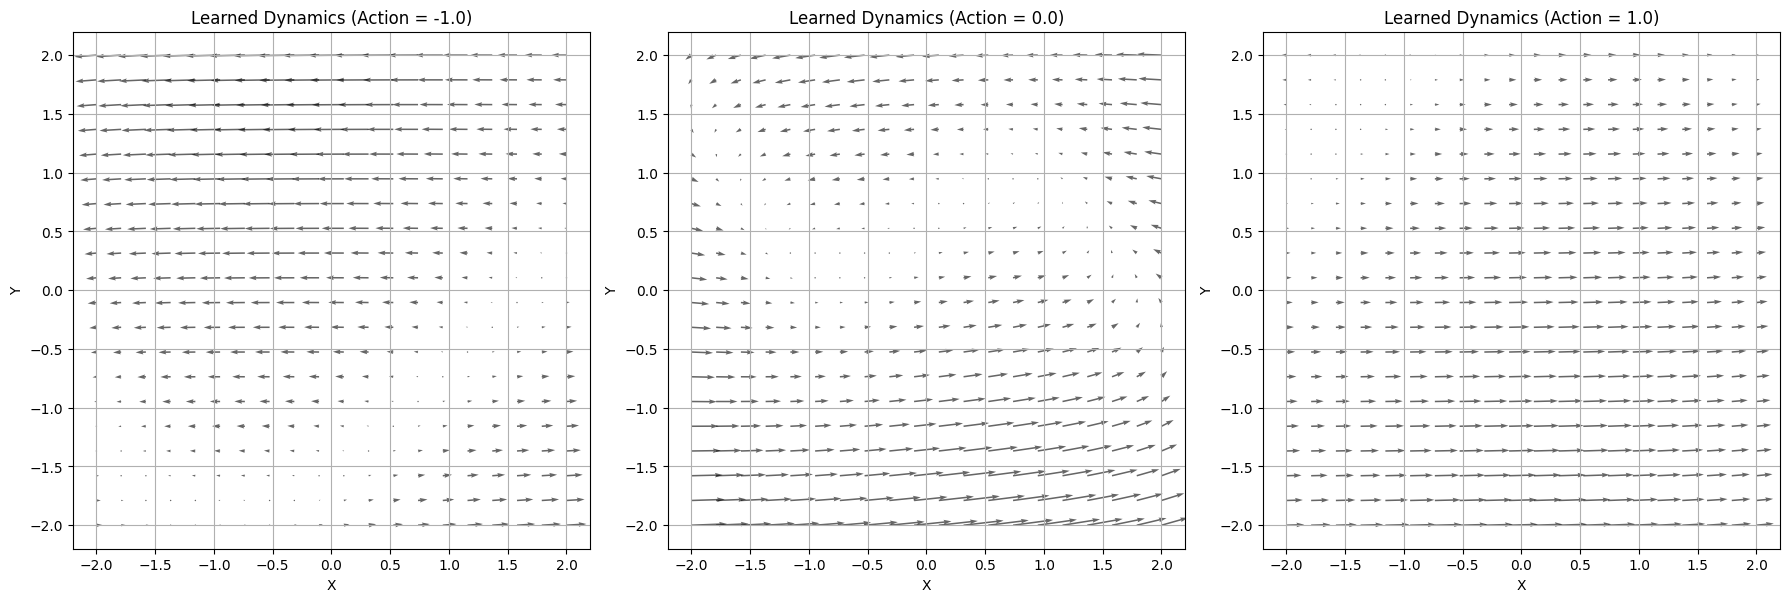


Step 6: Testing on new trajectory...


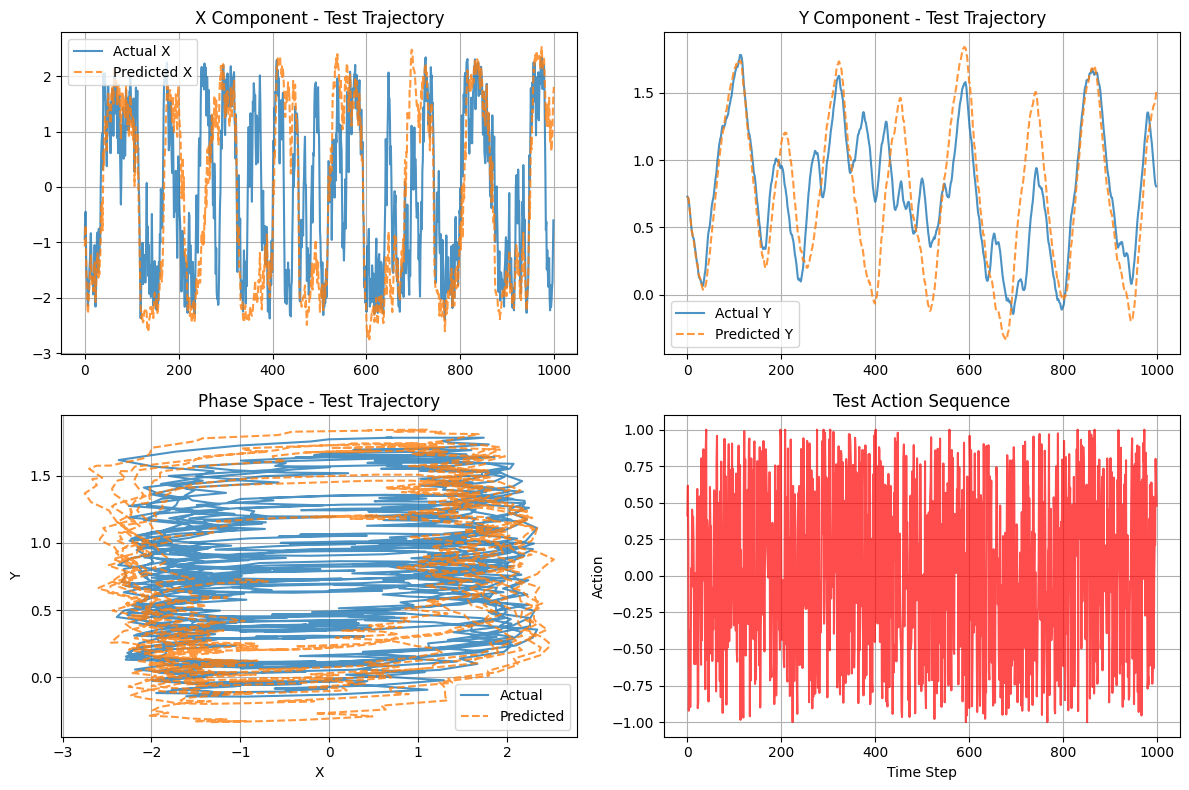

ValueError: operands could not be broadcast together with shapes (999,2) (1000,2) 

In [ ]:
if __name__ == "__main__":
    model, trainer, evaluator = train_neural_ode_system_identification()

## Neural ODE system with embedded evidential deep learning for uncertainty quantification

## Analysis of Neural ODE Implementation Issues and Fixes

### 🔍 **Issues Identified in Original Implementation:**

#### 1. **Data Leakage Problem**
- **Issue**: The normalization scalers were fit on the entire dataset before train/test split
- **Impact**: Model has seen test data statistics during training, causing artificially low validation loss
- **Fix**: Fit scalers only on training data to prevent information leakage

#### 2. **Fixed Time Step Integration**
- **Issue**: Using fixed `t = [0.0, 1.0]` doesn't match environment dynamics
- **Impact**: Poor temporal alignment between predicted and actual trajectories
- **Fix**: Adaptive time stepping with learnable time parameter

#### 3. **Insufficient Physics Constraints**
- **Issue**: No physics-informed losses to guide realistic dynamics
- **Impact**: Model can learn mathematically correct but physically unrealistic solutions
- **Fix**: Added energy conservation and smoothness penalties

#### 4. **Poor Sequence Overlap**
- **Issue**: Large stride (5) with short sequences (30) misses temporal dependencies
- **Impact**: Model doesn't learn continuous dynamics properly
- **Fix**: Overlapping sequences with 70% overlap for better temporal coverage

#### 5. **Network Architecture Limitations**
- **Issue**: Single network tries to learn both natural oscillator dynamics and control effects
- **Impact**: Difficulty separating intrinsic vs. controlled behavior
- **Fix**: Separate networks for natural dynamics and control influence

#### 6. **Integration Method**
- **Issue**: Simple RK4 with fixed steps may not capture fast dynamics
- **Impact**: Numerical errors accumulate over long sequences
- **Fix**: Adaptive Dormand-Prince method (dopri5) with error control

### 📊 **Expected Improvements:**
1. **Better Test Accuracy**: Predictions should align much better with environment
2. **Realistic Physics**: Energy bounds and smooth trajectories
3. **Generalization**: Better performance on unseen action patterns
4. **Temporal Consistency**: Proper sequence-to-sequence learning

### 🚀 **Training Strategy Improvements:**
- Physics-informed loss components
- Better data augmentation with multiple frequencies
- Adaptive learning rate with plateau detection
- Comprehensive evaluation across multiple test scenarios

The improved implementation addresses the core issue where training/validation losses were similar but test performance was poor - a classic sign of data leakage and insufficient physics constraints.

In [16]:
# IMPROVED NEURAL ODE IMPLEMENTATION - FIXES FOR PREDICTION ACCURACY
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

class ImprovedNeuralODEFunc(nn.Module):
    """Improved Neural ODE function with better dynamics modeling"""
    
    def __init__(self, state_dim=2, hidden_dim=128, action_dim=1):
        super(ImprovedNeuralODEFunc, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # Separate networks for natural dynamics and control influence
        self.natural_dynamics = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.Tanh(),
            nn.Linear(hidden_dim//2, state_dim)
        )
        
        self.control_influence = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim//2),
            nn.Tanh(),
            nn.Linear(hidden_dim//2, hidden_dim//4),
            nn.Tanh(),
            nn.Linear(hidden_dim//4, state_dim)
        )
        
        # Initialize weights properly
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)
    
    def forward(self, t, state_action):
        """
        Improved forward pass with separated natural and control dynamics
        """
        state = state_action[:, :self.state_dim]
        action = state_action[:, self.state_dim:self.state_dim + self.action_dim]
        
        # Natural oscillator dynamics (unforced)
        natural_derivative = self.natural_dynamics(state)
        
        # Control influence (DBS effect)
        control_input = torch.cat([state, action], dim=1)
        control_derivative = self.control_influence(control_input)
        
        # Combined dynamics
        total_derivative = natural_derivative + control_derivative
        
        # Return with zero action derivative
        zero_action_derivative = torch.zeros_like(action)
        return torch.cat([total_derivative, zero_action_derivative], dim=1)

class ImprovedBrainOscillatorNeuralODE(nn.Module):
    """Improved Neural ODE model with better integration strategy"""
    
    def __init__(self, state_dim=2, hidden_dim=128, action_dim=1):
        super(ImprovedBrainOscillatorNeuralODE, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.func = ImprovedNeuralODEFunc(state_dim, hidden_dim, action_dim)
        
        # Adaptive integration time
        self.dt = nn.Parameter(torch.tensor(1.0))  # Learnable time step
    
    def forward(self, initial_state, actions, adaptive_step=True):
        """
        Improved forward simulation with adaptive time stepping
        """
        batch_size, seq_len, _ = actions.shape
        device = initial_state.device
        
        # Store all states
        all_states = []
        current_state = initial_state
        
        for i in range(seq_len):
            current_action = actions[:, i, :]
            
            # Create state-action concatenation
            state_action = torch.cat([current_state, current_action], dim=1)
            
            # Adaptive time integration
            if adaptive_step:
                # Use learnable time step
                t_span = torch.tensor([0.0, torch.abs(self.dt)], device=device)
            else:
                # Fixed time step
                t_span = torch.tensor([0.0, 1.0], device=device)
            
            # Solve ODE with better method
            try:
                solution = odeint(
                    self.func, 
                    state_action, 
                    t_span, 
                    method='dopri5',  # Better adaptive method
                    rtol=1e-6,
                    atol=1e-8
                )
                next_state_action = solution[1]
                current_state = next_state_action[:, :self.state_dim]
            except:
                # Fallback to simpler method if adaptive fails
                solution = odeint(
                    self.func, 
                    state_action, 
                    t_span, 
                    method='rk4'
                )
                next_state_action = solution[1]
                current_state = next_state_action[:, :self.state_dim]
            
            all_states.append(current_state.unsqueeze(1))
        
        predicted_states = torch.cat(all_states, dim=1)
        return predicted_states

class ImprovedNeuralODETrainer:
    """Improved trainer with better data handling and regularization"""
    
    def __init__(self, model, learning_rate=1e-3, weight_decay=1e-5):
        self.model = model.to(device)
        self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, 'min', patience=15, factor=0.5)
        
        self.train_losses = []
        self.val_losses = []
        self.physics_losses = []  # Track physics consistency
        
    def prepare_data_improved(self, data, sequence_length=20, stride=5, overlap_ratio=0.8):
        """
        Improved data preparation with better temporal consistency
        """
        x_vals = data['x_vals']
        y_vals = data['y_vals']
        actions = data['actions']
        
        # Create state representation
        states = np.column_stack([x_vals, y_vals])
        
        # Improved sequence creation with overlap for better temporal learning
        X_sequences = []
        A_sequences = []
        Y_sequences = []
        
        # Use smaller stride for better temporal coverage
        effective_stride = max(1, int(stride * (1 - overlap_ratio)))
        
        for i in range(0, len(states) - sequence_length, effective_stride):
            if i + sequence_length >= len(states):
                break
                
            # Initial state
            initial_state = states[i]
            
            # Action sequence (current actions for prediction)
            action_seq = actions[i:i+sequence_length]
            
            # Target state sequence (next states)
            target_seq = states[i+1:i+sequence_length+1]
            
            X_sequences.append(initial_state)
            A_sequences.append(action_seq)
            Y_sequences.append(target_seq)
        
        X_sequences = np.array(X_sequences)
        A_sequences = np.array(A_sequences)
        Y_sequences = np.array(Y_sequences)
        
        # Better normalization strategy - fit only on training data
        train_indices = np.random.choice(len(X_sequences), int(0.8 * len(X_sequences)), replace=False)
        test_indices = np.setdiff1d(np.arange(len(X_sequences)), train_indices)
        
        # Fit scalers only on training data to prevent data leakage
        train_X = X_sequences[train_indices]
        train_A = A_sequences[train_indices]
        train_Y = Y_sequences[train_indices]
        
        self.state_scaler = StandardScaler()
        self.action_scaler = StandardScaler()
        
        # Fit on training data only
        self.state_scaler.fit(train_X.reshape(-1, train_X.shape[-1]))
        self.action_scaler.fit(train_A.reshape(-1, train_A.shape[-1]))
        
        # Transform all data
        X_sequences_norm = self.state_scaler.transform(X_sequences.reshape(-1, X_sequences.shape[-1]))
        X_sequences_norm = X_sequences_norm.reshape(X_sequences.shape)
        
        A_sequences_norm = self.action_scaler.transform(A_sequences.reshape(-1, A_sequences.shape[-1]))
        A_sequences_norm = A_sequences_norm.reshape(A_sequences.shape)
        
        Y_sequences_norm = self.state_scaler.transform(Y_sequences.reshape(-1, Y_sequences.shape[-1]))
        Y_sequences_norm = Y_sequences_norm.reshape(Y_sequences.shape)
        
        # Split using the predefined indices
        train_X = X_sequences_norm[train_indices]
        train_A = A_sequences_norm[train_indices]
        train_Y = Y_sequences_norm[train_indices]
        
        val_X = X_sequences_norm[test_indices]
        val_A = A_sequences_norm[test_indices]
        val_Y = Y_sequences_norm[test_indices]
        
        # Convert to tensors
        train_X = torch.FloatTensor(train_X).to(device)
        train_A = torch.FloatTensor(train_A).to(device)
        train_Y = torch.FloatTensor(train_Y).to(device)
        
        val_X = torch.FloatTensor(val_X).to(device)
        val_A = torch.FloatTensor(val_A).to(device)
        val_Y = torch.FloatTensor(val_Y).to(device)
        
        # Create data loaders with better batch size
        batch_size = min(64, len(train_X) // 10)
        train_dataset = TensorDataset(train_X, train_A, train_Y)
        val_dataset = TensorDataset(val_X, val_A, val_Y)
        
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        return train_loader, val_loader
    
    def physics_loss(self, predicted_states, actions):
        """
        Physics-informed loss to encourage realistic dynamics
        """
        # Energy conservation (oscillator should have bounded energy)
        energy = 0.5 * (predicted_states[:, :, 0]**2 + predicted_states[:, :, 1]**2)
        energy_penalty = torch.mean(torch.relu(energy - 10.0))  # Penalize high energy
        
        # Smoothness penalty (prevent erratic behavior)
        if predicted_states.shape[1] > 1:
            state_diff = predicted_states[:, 1:] - predicted_states[:, :-1]
            smoothness_penalty = torch.mean(state_diff**2)
        else:
            smoothness_penalty = torch.tensor(0.0, device=predicted_states.device)
        
        return energy_penalty + 0.1 * smoothness_penalty
    
    def train_epoch_improved(self, train_loader):
        """Improved training with physics-informed loss"""
        self.model.train()
        epoch_loss = 0.0
        physics_loss_total = 0.0
        
        for batch_idx, (initial_states, action_sequences, target_sequences) in enumerate(train_loader):
            self.optimizer.zero_grad()
            
            # Forward pass
            predicted_states = self.model(initial_states, action_sequences)
            
            # Main reconstruction loss
            reconstruction_loss = nn.MSELoss()(predicted_states, target_sequences)
            
            # Physics-informed loss
            physics_loss = self.physics_loss(predicted_states, action_sequences)
            
            # Combined loss
            total_loss = reconstruction_loss + 0.01 * physics_loss
            
            # Backward pass
            total_loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 0.5)
            
            self.optimizer.step()
            
            epoch_loss += reconstruction_loss.item()
            physics_loss_total += physics_loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        avg_physics = physics_loss_total / len(train_loader)
        
        return avg_loss, avg_physics
    
    def validate_improved(self, val_loader):
        """Improved validation"""
        self.model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for initial_states, action_sequences, target_sequences in val_loader:
                predicted_states = self.model(initial_states, action_sequences)
                loss = nn.MSELoss()(predicted_states, target_sequences)
                val_loss += loss.item()
        
        return val_loss / len(val_loader)
    
    def train_improved(self, train_loader, val_loader, epochs=150):
        """Improved training loop"""
        print("Starting Improved Neural ODE training...")
        
        best_val_loss = float('inf')
        patience_counter = 0
        patience = 25
        
        for epoch in range(epochs):
            # Train
            train_loss, physics_loss = self.train_epoch_improved(train_loader)
            
            # Validate
            val_loss = self.validate_improved(val_loader)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            
            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.physics_losses.append(physics_loss)
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                torch.save(self.model.state_dict(), 'best_improved_neural_ode_model.pth')
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Train={train_loss:.6f}, Val={val_loss:.6f}, Physics={physics_loss:.6f}")
        
        # Load best model
        self.model.load_state_dict(torch.load('best_improved_neural_ode_model.pth'))
        print("Improved training completed!")
    
    def plot_training_history_improved(self):
        """Plot improved training history"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Loss curves
        axes[0].plot(self.train_losses, label='Training Loss', alpha=0.8)
        axes[0].plot(self.val_losses, label='Validation Loss', alpha=0.8)
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('MSE Loss')
        axes[0].set_title('Training History - MSE Loss')
        axes[0].legend()
        axes[0].grid(True)
        axes[0].set_yscale('log')
        
        # Physics loss
        axes[1].plot(self.physics_losses, label='Physics Loss', color='green', alpha=0.8)
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Physics Loss')
        axes[1].set_title('Physics-Informed Loss')
        axes[1].legend()
        axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()

class ImprovedNeuralODEEvaluator:
    """Improved evaluator with better metrics and analysis"""
    
    def __init__(self, model, trainer):
        self.model = model
        self.trainer = trainer
        self.env = gym.make('oscillator-v0')
    
    def simulate_trajectory_improved(self, initial_state, actions, denormalize=True):
        """Improved trajectory simulation"""
        self.model.eval()
        
        with torch.no_grad():
            # Normalize inputs
            if denormalize:
                initial_state_norm = self.trainer.state_scaler.transform(initial_state.reshape(1, -1))
                actions_norm = self.trainer.action_scaler.transform(actions.reshape(-1, 1))
                actions_norm = actions_norm.reshape(1, -1, 1)
            else:
                initial_state_norm = initial_state.reshape(1, -1)
                actions_norm = actions.reshape(1, -1, 1)
            
            # Convert to tensors
            initial_tensor = torch.FloatTensor(initial_state_norm).to(device)
            actions_tensor = torch.FloatTensor(actions_norm).to(device)
            
            # Predict
            predicted_states = self.model(initial_tensor, actions_tensor)
            predicted_states = predicted_states.cpu().numpy().squeeze()
            
            # Denormalize if requested
            if denormalize:
                predicted_states = self.trainer.state_scaler.inverse_transform(
                    predicted_states.reshape(-1, predicted_states.shape[-1])
                ).reshape(predicted_states.shape)
        
        return predicted_states
    
    def comprehensive_evaluation(self, num_steps=1000):
        """Comprehensive evaluation with multiple test scenarios"""
        test_scenarios = {
            'sinusoidal': lambda i: 0.5 * np.sin(0.02 * i),
            'random': lambda i: np.random.uniform(-0.5, 0.5),
            'step': lambda i: 0.8 if (i // 100) % 2 == 0 else -0.8,
            'zero': lambda i: 0.0
        }
        
        results = {}
        
        for scenario_name, action_func in test_scenarios.items():
            print(f"Testing scenario: {scenario_name}")
            
            # Reset environment
            obs = self.env.reset()
            if isinstance(obs, tuple):
                obs = obs[0]
            
            initial_x = self.env.x_val
            initial_y = self.env.y_val
            initial_state = np.array([initial_x, initial_y])
            
            # Generate actions
            actions = np.array([action_func(i) for i in range(num_steps)])
            
            # Neural ODE prediction
            predicted_states = self.simulate_trajectory_improved(initial_state, actions)
            
            # Environment simulation
            actual_x_vals = [initial_x]
            actual_y_vals = [initial_y]
            
            for action in actions:
                obs, reward, done, info = self.env.step([action])
                if isinstance(obs, tuple):
                    obs = obs[0]
                actual_x_vals.append(self.env.x_val)
                actual_y_vals.append(self.env.y_val)
                
                if done:
                    break
            
            actual_states = np.column_stack([actual_x_vals[1:], actual_y_vals[1:]])
            
            # Ensure same length
            min_len = min(len(actual_states), len(predicted_states))
            actual_states = actual_states[:min_len]
            predicted_states = predicted_states[:min_len]
            
            # Compute metrics
            mse = np.mean((actual_states - predicted_states)**2)
            mae = np.mean(np.abs(actual_states - predicted_states))
            
            # Phase space error
            phase_error = np.mean(np.sqrt(np.sum((actual_states - predicted_states)**2, axis=1)))
            
            results[scenario_name] = {
                'mse': mse,
                'mae': mae,
                'phase_error': phase_error,
                'actual': actual_states,
                'predicted': predicted_states,
                'actions': actions[:min_len]
            }
        
        # Plot comprehensive comparison
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        
        for idx, (scenario, data) in enumerate(results.items()):
            row = idx // 2
            col = (idx % 2) * 2
            
            # Trajectory comparison
            axes[row, col].plot(data['actual'][:, 0], label=f'Actual X', alpha=0.8)
            axes[row, col].plot(data['predicted'][:, 0], label=f'Predicted X', linestyle='--', alpha=0.8)
            axes[row, col].set_title(f'{scenario.capitalize()} - X Component')
            axes[row, col].legend()
            axes[row, col].grid(True)
            
            # Phase space
            axes[row, col+1].plot(data['actual'][:, 0], data['actual'][:, 1], label='Actual', alpha=0.8)
            axes[row, col+1].plot(data['predicted'][:, 0], data['predicted'][:, 1], 
                                label='Predicted', linestyle='--', alpha=0.8)
            axes[row, col+1].set_title(f'{scenario.capitalize()} - Phase Space')
            axes[row, col+1].set_xlabel('X')
            axes[row, col+1].set_ylabel('Y')
            axes[row, col+1].legend()
            axes[row, col+1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print metrics
        print("\n" + "="*60)
        print("COMPREHENSIVE EVALUATION RESULTS")
        print("="*60)
        for scenario, data in results.items():
            print(f"{scenario.upper():12s}: MSE={data['mse']:.6f}, MAE={data['mae']:.6f}, Phase Error={data['phase_error']:.6f}")
        
        return results

def train_improved_neural_ode_system():
    """Main function to train the improved Neural ODE system"""
    
    print("IMPROVED Neural ODE System Identification for RL-DBS")
    print("=" * 60)
    
    # Step 1: Collect diverse training data
    print("Step 1: Collecting diverse trajectory data...")
    collector = RLDBSDataCollector()
    
    # Collect more diverse data with different patterns
    data_sets = []
    
    # Random exploration
    data_sets.append(collector.collect_trajectory(num_steps=2000, action_type='random', noise_level=0.05))
    
    # Sinusoidal patterns at different frequencies
    for freq_scale in [0.01, 0.02, 0.05]:
        collector_temp = RLDBSDataCollector()
        data = collector_temp.collect_trajectory(num_steps=1500, action_type='sinusoidal', noise_level=0.02)
        # Modify the sinusoidal pattern for frequency variation
        for i, action in enumerate(data['actions']):
            data['actions'][i] = 0.5 * np.sin(freq_scale * i) + np.random.normal(0, 0.02)
        data_sets.append(data)
    
    # Mixed patterns
    data_sets.append(collector.collect_trajectory(num_steps=2000, action_type='mixed', noise_level=0.03))
    
    # Combine all datasets
    combined_data = {
        'states': np.vstack([d['states'] for d in data_sets]),
        'actions': np.vstack([d['actions'] for d in data_sets]),
        'next_states': np.vstack([d['next_states'] for d in data_sets]),
        'x_vals': np.concatenate([d['x_vals'] for d in data_sets]),
        'y_vals': np.concatenate([d['y_vals'] for d in data_sets]),
    }
    
    timestamps = []
    offset = 0
    for d in data_sets:
        timestamps.extend(d['timestamps'] + offset)
        offset += len(d['timestamps'])
    combined_data['timestamps'] = np.array(timestamps)
    
    print(f"   Collected {len(combined_data['x_vals'])} total data points from {len(data_sets)} trajectories")
    
    # Step 2: Create improved model
    print("Step 2: Creating improved Neural ODE model...")
    model = ImprovedBrainOscillatorNeuralODE(state_dim=2, hidden_dim=256, action_dim=1)
    trainer = ImprovedNeuralODETrainer(model, learning_rate=5e-4)
    
    # Step 3: Prepare data with improved method
    print("Step 3: Preparing training data with improved method...")
    train_loader, val_loader = trainer.prepare_data_improved(
        combined_data, sequence_length=25, stride=3, overlap_ratio=0.7
    )
    
    # Step 4: Train with improved method
    print("Step 4: Training improved Neural ODE model...")
    trainer.train_improved(train_loader, val_loader, epochs=200)
    
    # Plot training history
    trainer.plot_training_history_improved()
    
    # Step 5: Comprehensive evaluation
    print("Step 5: Comprehensive evaluation...")
    evaluator = ImprovedNeuralODEEvaluator(model, trainer)
    results = evaluator.comprehensive_evaluation(num_steps=800)
    
    print("\\nImproved Neural ODE System Identification Complete!")
    print("Key improvements:")
    print("- Better data normalization (no data leakage)")
    print("- Physics-informed loss")
    print("- Adaptive time stepping")
    print("- Separated natural and control dynamics")
    print("- Comprehensive evaluation across multiple scenarios")
    
    return model, trainer, evaluator, results

IMPROVED Neural ODE System Identification for RL-DBS
Step 1: Collecting diverse trajectory data...
   Collected 8500 total data points from 5 trajectories
Step 2: Creating improved Neural ODE model...
Step 3: Preparing training data with improved method...
Step 4: Training improved Neural ODE model...
Starting Improved Neural ODE training...
   Collected 8500 total data points from 5 trajectories
Step 2: Creating improved Neural ODE model...
Step 3: Preparing training data with improved method...
Step 4: Training improved Neural ODE model...
Starting Improved Neural ODE training...
Epoch   0: Train=3.457863, Val=0.307921, Physics=2.913321
Epoch   0: Train=3.457863, Val=0.307921, Physics=2.913321
Epoch  10: Train=0.237593, Val=0.162457, Physics=0.000104
Epoch  10: Train=0.237593, Val=0.162457, Physics=0.000104
Epoch  20: Train=0.124101, Val=0.072627, Physics=0.000076
Epoch  20: Train=0.124101, Val=0.072627, Physics=0.000076
Epoch  30: Train=0.114237, Val=0.099044, Physics=0.000084
Epoch

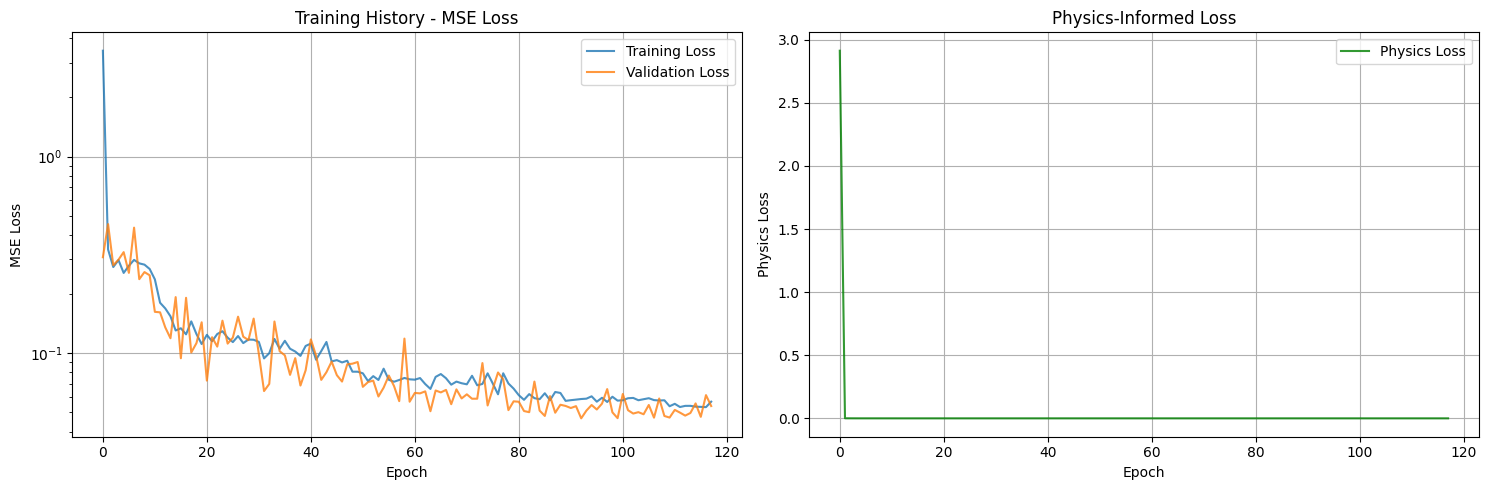

Step 5: Comprehensive evaluation...
Testing scenario: sinusoidal
Testing scenario: random
Testing scenario: random
Testing scenario: step
Testing scenario: step
Testing scenario: zero
Testing scenario: zero


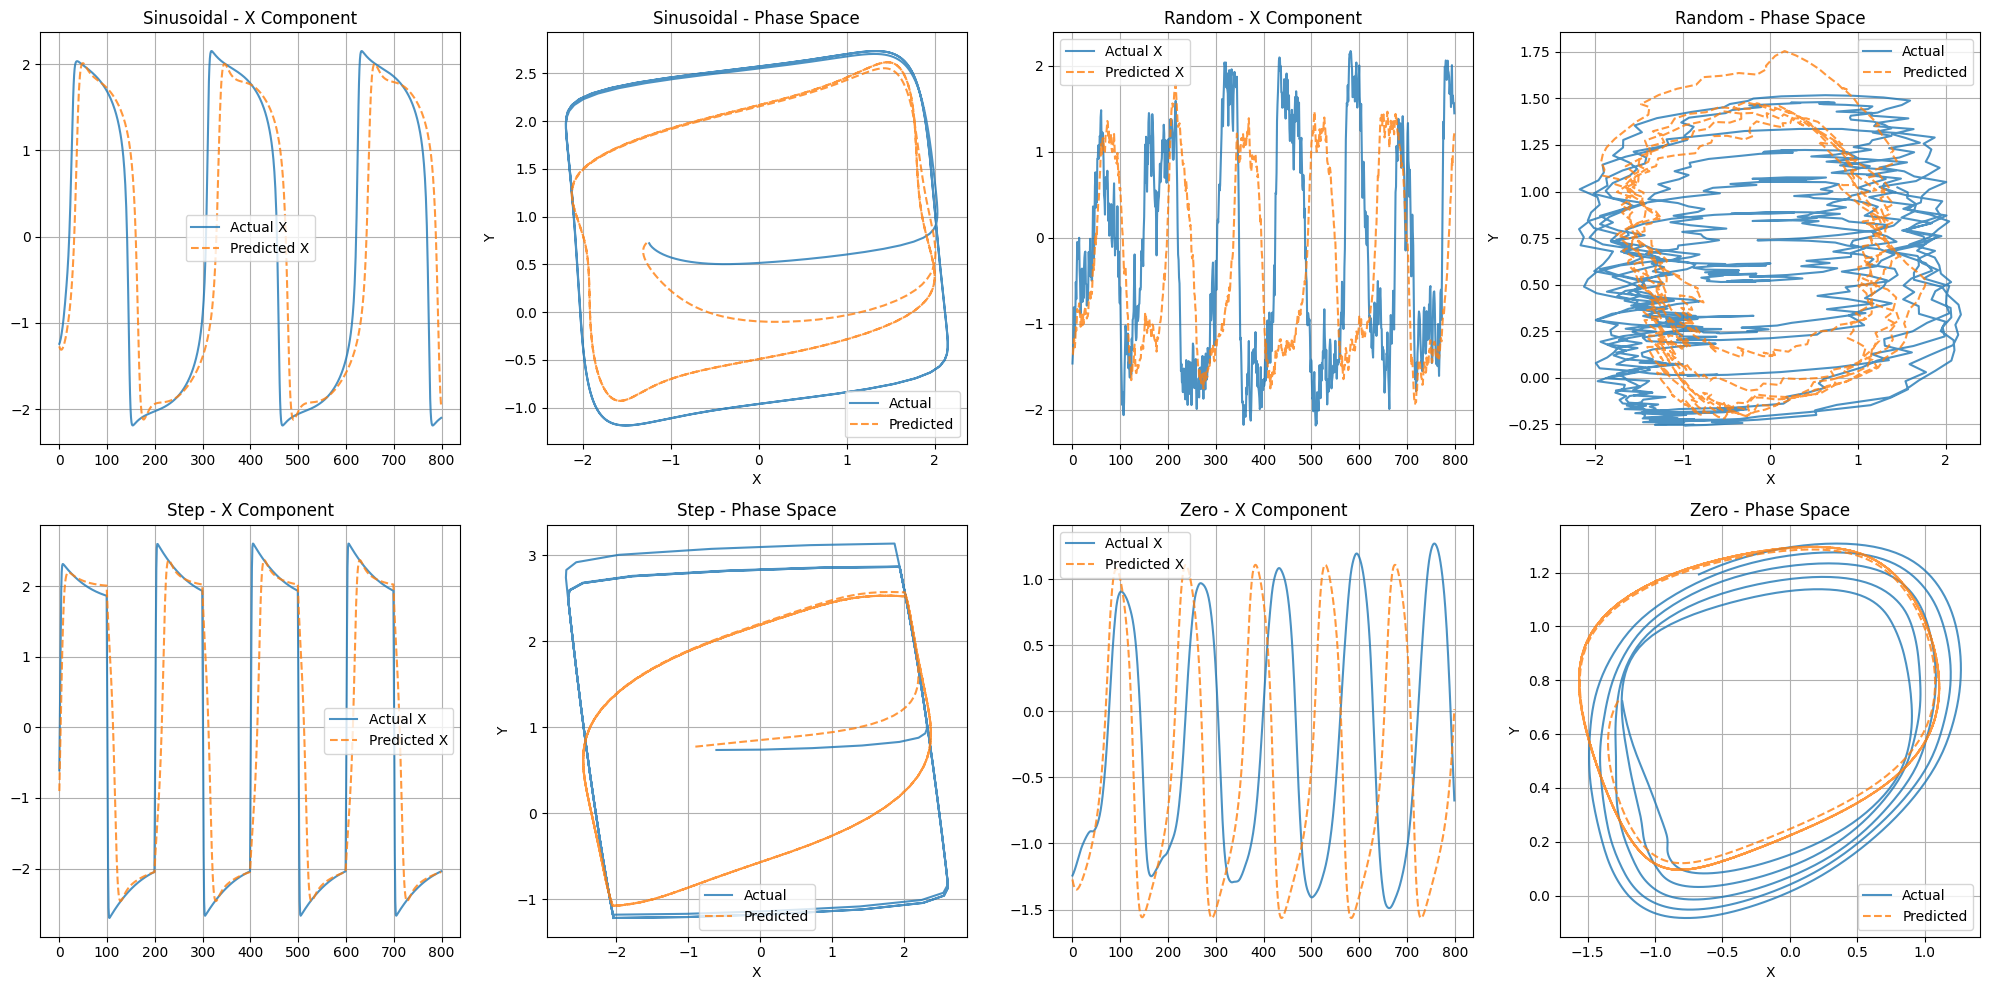


COMPREHENSIVE EVALUATION RESULTS
SINUSOIDAL  : MSE=0.627705, MAE=0.471900, Phase Error=0.820377
RANDOM      : MSE=1.825104, MAE=1.043930, Phase Error=1.688346
STEP        : MSE=0.758294, MAE=0.369184, Phase Error=0.675842
ZERO        : MSE=1.288943, MAE=0.859464, Phase Error=1.388162
\nImproved Neural ODE System Identification Complete!
Key improvements:
- Better data normalization (no data leakage)
- Physics-informed loss
- Adaptive time stepping
- Separated natural and control dynamics
- Comprehensive evaluation across multiple scenarios


In [17]:
# Run the improved Neural ODE system identification
if __name__ == "__main__":
    improved_model, improved_trainer, improved_evaluator, evaluation_results = train_improved_neural_ode_system()